# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data 


Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [ ]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [ ]:
# -- YOUR CODE HERE --
train.isnull().sum()

id             0
keyword       44
location    1760
text           0
target         0
dtype: int64

In [ ]:
#так как имеются пропуски в location, keyword, заполним их пустой строкой
# для удобства работы с нашим датасетом создаем маску, указывающую на столбцы с категориальными признаками
cat_features_mask = (
    test.dtypes == "object"
).values  # категориальные признаки имеют тип "object"
X_cat = test[test.columns[cat_features_mask]].fillna("")
X_real = test[test.columns[~cat_features_mask]]
X_no_mis = pd.concat([X_real, X_cat], axis=1)
test = X_no_mis
cat_features_mask = (
    train.dtypes == "object"
).values  # категориальные признаки имеют тип "object"
X_cat = train[train.columns[cat_features_mask]].fillna("")
X_real = train[train.columns[~cat_features_mask]]
X_no_mis = pd.concat([X_real, X_cat], axis=1)
train = X_no_mis
X_no_mis

,id,target,keyword,location,text
1186,1707,0,bridge%20collapse,,bridge%20collapse bridge%20collapse bridge%2...
4071,5789,1,hail,"Carol Stream, Illinois","hail Carol Stream, Illinois hail Carol Stream,..."
5461,7789,1,police,Houston,police Houston police Houston police Houston...
5787,8257,1,rioting,,rioting rioting rioting rioting rioting S...
7445,10656,0,wounds,Lake Highlands,wounds Lake Highlands wounds Lake Highlands wo...
...,...,...,...,...,...
5226,7470,0,obliteration,Merica!,obliteration Merica! obliteration Merica! obli...
5390,7691,0,panic,,panic panic panic panic panic just had a ...
860,1242,0,blood,,blood blood blood blood blood Omron HEM-7...
7603,10862,1,,,Officials say a quarantine is in pla...


In [ ]:
X_no_mis.isnull().sum()

id          0
target      0
keyword     0
location    0
text        0
dtype: int64

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?


In [ ]:
# -- YOUR CODE HERE --
train['target'].value_counts()

0    3024
1    2305
Name: target, dtype: int64

2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [ ]:
popular_keywords = (train['keyword'].value_counts().sort_values(ascending=False)[:10]).index.to_list()
popular_keywords

['',
 'damage',
 'siren',
 'wreckage',
 'fatalities',
 'deluge',
 'emergency',
 'harm',
 'twister',
 'nuclear%20reactor']

<Axes: xlabel='keyword', ylabel='Count'>

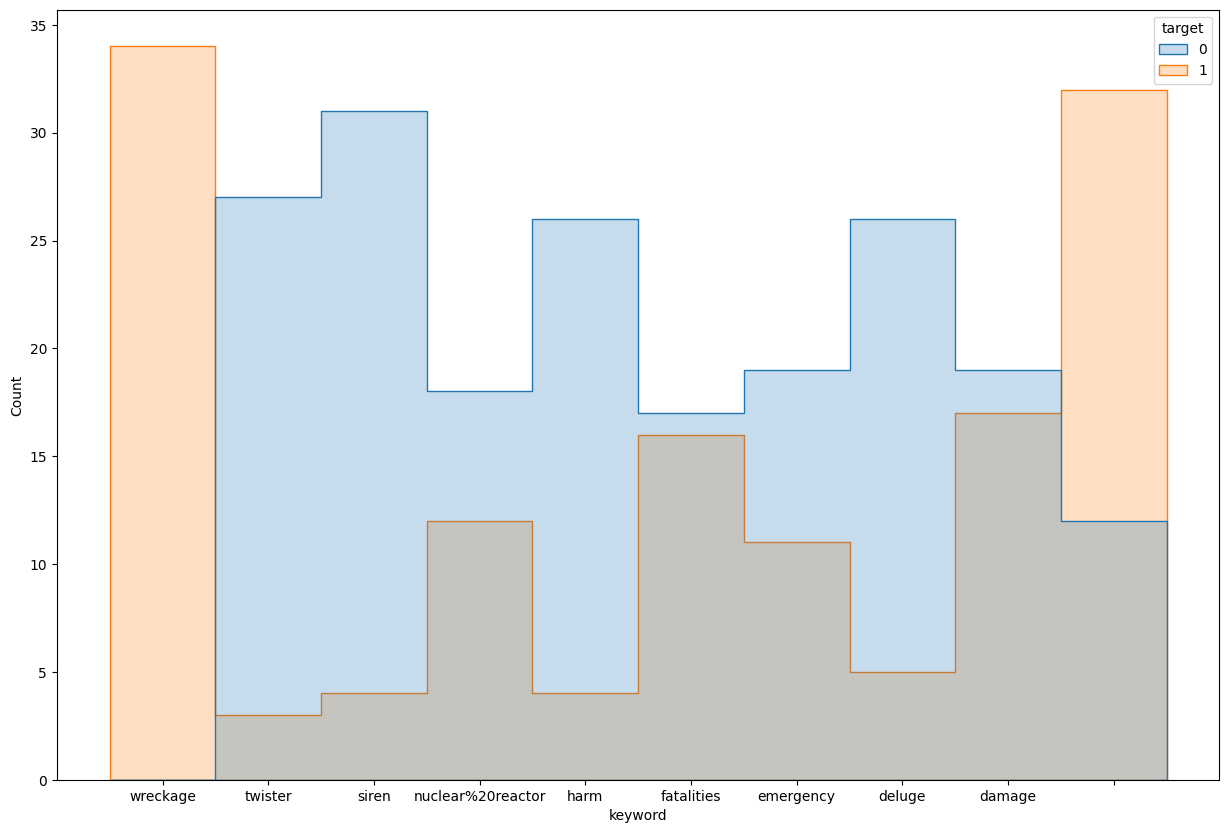

In [ ]:
df = (train.loc[train['keyword']. isin(popular_keywords)]).sort_values('keyword',ascending=False)
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(data=df, x="keyword", hue="target",element="step", multiple="layer")

Если встречалось слово wrecage всегда катастрофа оказывалась ложной.
Когда слова harm, deluge, siren, twister - то почти всегда катастрофа была инстинной.
а остальные слова примерно 50 на 50.

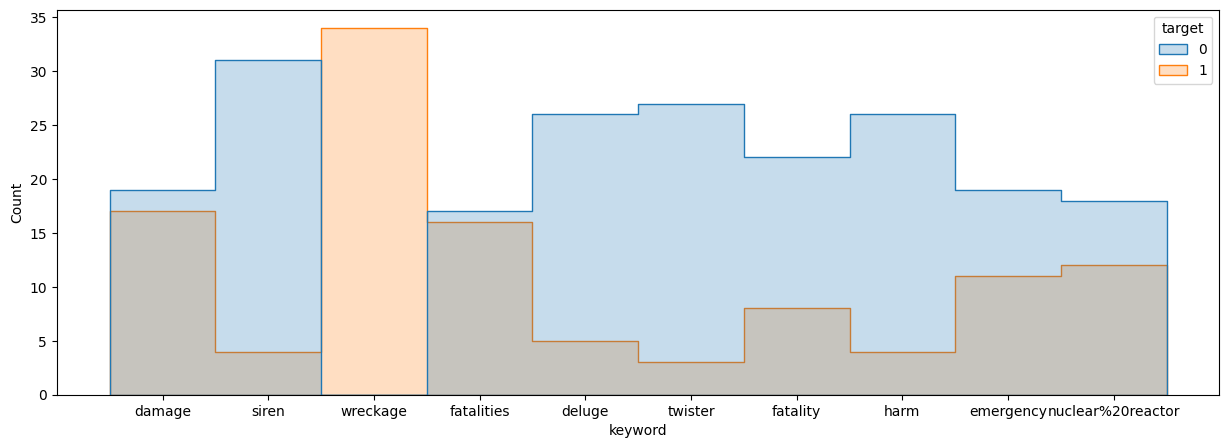

In [ ]:
# -- YOUR CODE HERE --
plt.show()

**Выводы**: TODO

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [ ]:
train.loc[[6590, 7122, 2769]]

,id,target,keyword,location,text
6590,9436,1,survivors,"Marietta, GA","survivors Marietta, GA survivors Marietta, GA ..."
7122,10203,1,violent%20storm,,violent%20storm violent%20storm violent%20st...
2769,3980,0,devastation,Atlanta g.a.,devastation Atlanta g.a. devastation Atlanta g...


In [ ]:
# -- YOUR CODE HERE --
train['text'] = train['keyword'].map(str) + ' ' + train['location'].map(str)+ ' ' + train['text'].map(str)
train_new = train.drop(['id', 'keyword', 'location'], axis=1)
test['text'] = test['keyword'].map(str) + ' ' + test['location'].map(str)+ ' ' + test['text'].map(str)
test_new = test.drop(['id', 'keyword', 'location'], axis=1)
train_new.loc[[6590, 7122, 2769]]

,target,text
6590,1,"survivors Marietta, GA survivors Marietta, GA ..."
7122,1,violent%20storm violent%20storm violent%20st...
2769,0,devastation Atlanta g.a. devastation Atlanta g...


In [ ]:
train_new.loc[[6590, 7122, 2769]]

,text,target
6590,"survivors Marietta, GA Stemming from my #Cubs ...",1
7122,violent%20storm If you were the NWS wth a rot...,1
2769,devastation Atlanta g.a. http://t.co/Gxgm1T3W0...,0


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# -- YOUR CODE HERE --
cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(train_new['text'])

In [ ]:
X
#размер 5329x18455

<5329x18455 sparse matrix of type '<class 'numpy.int64'>'
	with 86671 stored elements in Compressed Sparse Row format>

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [ ]:
cnt_vec.vocabulary_.keys()

In [ ]:
def count_w(vocabulary, func):
    #функция для подсчета количества
    сount = 0
    for key, val in vocabulary.items(): 
      if func(key):
        сount += 1
    return сount

def contains_digit(s: str) -> bool:
    # Проверка, содержит ли слово цифры
    # -- YOUR CODE HERE --
    return any(chr.isdigit() for chr in s)

def contains_punctuation(s: str) -> bool:    
    # Проверка, содержит ли слово пунктуацию
    # -- YOUR CODE HERE --
    from string import punctuation
    return any(x in punctuation for x in s)

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    # -- YOUR CODE HERE --
    import re
    match =re.fullmatch(r'#{1}.+', s)
    return (True if match else False) 

def is_mention(s: str) -> bool:
    # Проверка, является ли слово упоминанием
    # -- YOUR CODE HERE --
    import re
    match =re.fullmatch(r'@{1}.+', s)
    return (True if match else False) 

def investigate_vocabulary(vocabulary):
    # -- YOUR CODE HERE --
    print('With digit:      ', # -- YOUR CODE HERE --
          count_w(vocabulary, contains_digit)
          )
    print('With punctuation:', # -- YOUR CODE HERE --
          count_w(vocabulary, contains_punctuation)
          )
    print('Hashtags:        ', # -- YOUR CODE HERE --
          count_w(vocabulary, is_hashtag)
          )
    print('Mentions:        ', # -- YOUR CODE HERE --
          count_w(vocabulary, is_mention)
          )




In [ ]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
investigate_vocabulary(dummy_vocab)

With digit:       2
With punctuation: 7
Hashtags:         1
Mentions:         3


In [ ]:
investigate_vocabulary(# -- YOUR CODE HERE --
                       cnt_vec.vocabulary_
                       )

With digit:       3812
With punctuation: 315
Hashtags:         0
Mentions:         0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [ ]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

In [ ]:
help(TweetTokenizer)

In [ ]:
# -- YOUR CODE HERE --
cnt_vec = CountVectorizer(tokenizer = TweetTokenizer().tokenize)
X = cnt_vec.fit_transform(train_new['text'])

In [ ]:
investigate_vocabulary(# -- YOUR CODE HERE --
                       cnt_vec.vocabulary_
                       )
#с токенизатором разбиение получилось лучше, хештеги и упоминания праивльно поделились

With digit:       3939
With punctuation: 7338
Hashtags:         1469
Mentions:         1678


**Сравнение:** TODO

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer



In [416]:
from string import punctuation
"".join(list(punctuation))

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [398]:
import re
match = re.fullmatch(r'[a-zA-Z]+', '')
print (True if match else False) 

False


In [425]:
def contains_only_latin_letters(s: str) -> bool:
    # Проверка, содержит ли слово только латинские буквы
    # -- YOUR CODE HERE --
    import re
    match = re.fullmatch(r'[a-zA-Z]+', s)
    return (True if match else False) 

def is_emoji(s: str) -> bool:
    # Проверка, является ли слово смайликом
    # -- YOUR CODE HERE --
    import re    
    match = re.fullmatch('[-!"#$%&\'*+,./:;<=>?@\\^_`|~]*[\[\]\(\)\{\}]+', s)
    #не очень поняла, что именно считать смайликом, поэтому будем считать, что сколько угодно символов из пунктуации а потом обязательно скобочки
    return (True if match else False) 
    # from string import punctuation
    # return any(x in punctuation for x in s)

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    # -- YOUR CODE HERE --
    import re
    match = re.fullmatch(r'#{1}[a-zA-Z]+', s)
    return (True if match else False) 

def custom_tokenizer(s: str) -> List[str]:    
    # Кастомный токенайзер
    # -- YOUR CODE HERE --
    r = s.lower ()#Приведет все буквы к нижнему регистру
    from nltk.tokenize import TweetTokenizer
    tw = TweetTokenizer()
    lst = tw.tokenize(r)#Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
    res = []
    import nltk
    from nltk.stem.snowball import SnowballStemmer
    for i in lst:
      if (((contains_only_latin_letters(i)) or (is_emoji(i)) or (is_hashtag(i)))):#Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
        if (i not in nltk.corpus.stopwords.words('english')):#Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
          res.append(i)
    stemmer = SnowballStemmer("english")
    stemmed_res = [stemmer.stem(w) for w in res]
    return stemmed_res

  

In [407]:
custom_tokenizer('She LOVES painting :-) #art')

['love', 'paint', '#art']

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [409]:
# -- YOUR CODE HERE --
for i in train_new.head(10)['text'] :
  print(custom_tokenizer(i))

['bridg', 'bridg', 'bridg', 'bridg', 'bridg', 'bridg', 'bridg', 'ash', ':', 'australia', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', ':', 'england', 'bundl', 'australia']
['hail', 'carol', 'stream', 'illinoi', 'hail', 'carol', 'stream', 'illinoi', 'hail', 'carol', 'stream', 'illinoi', 'hail', 'carol', 'stream', 'illinoi', 'hail', 'carol', 'stream', 'illinoi', 'hail', 'carol', 'stream', 'illinoi', 'hail', 'carol', 'stream', 'illinoi', 'great', 'michigan', 'techniqu', 'camp', 'thank', '#goblu', '#wrestleon']
['polic', 'houston', 'polic', 'houston', 'polic', 'houston', 'polic', 'houston', 'polic', 'houston', 'polic', 'houston', 'polic', 'houston', 'cnn', ':', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic']
['riot', 'riot', 'riot', 'riot', 'riot', 'riot', 'riot', 'still', 'riot', 'coupl', 'hour', 'left', 'class']
['wound', 'lake', 'highland', 'wound', 'lake', 'highland', 'wound', 'lake', 'highland', 'wound', 'lake', 'highland', 'wound', 'lake', 'highland',

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.


In [410]:
y_train = train_new['target']
X_train = train_new.drop('target', axis=1)
y_test = test_new['target']
X_test = test_new.drop('target', axis=1)

In [ ]:
X_train.isnull().sum()

text    0
dtype: int64

In [419]:
# -- YOUR CODE HERE --
cnt_vec = CountVectorizer(tokenizer =lambda text: custom_tokenizer(text))
#cnt_vec = CountVectorizer(tokenizer = TweetTokenizer().tokenize)
bow = cnt_vec.fit_transform(X_train['text'])
bow_test = cnt_vec.transform(X_test['text'])
#The regex pattern gets ignored if you pass a custom tokenizer, но как делать без регулярок, перебором посимвольно?

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


2. Обучите LogisticRegression на полученных признаках.


In [420]:
from sklearn.linear_model import LogisticRegression
# -- YOUR CODE HERE --
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

clf = LogisticRegression()
clf.fit(bow, y_train)
pred = clf.predict(bow_test)

3. Посчитайте метрику f1-score на тестовых данных.

In [421]:
from sklearn.metrics import f1_score

# -- YOUR CODE HERE --
print(f'F1 score: {f1_score(y_test, pred)}')

F1 score: 0.7052631578947369


## Задание 9 (1 балл)

1. Повторите 8 задание, но с tf-idf векторизатором. Как изменилось качество?


In [422]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MaxAbsScaler
# 1
# -- YOUR CODE HERE --
vec = TfidfVectorizer(tokenizer =lambda text: custom_tokenizer(text))
vec_train = vec.fit_transform(X_train['text'])
vec_test = vec.transform(X_test['text'])

scaler = MaxAbsScaler()
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

clf = LogisticRegression()
clf.fit(vec_train, y_train)
pred_tfidf = clf.predict(vec_test)
print(f'F1 score: {f1_score(y_test, pred_tfidf)}')

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


F1 score: 0.717426273458445


In [423]:
vec_train

<5329x10477 sparse matrix of type '<class 'numpy.float64'>'
	with 50440 stored elements in Compressed Sparse Row format>

с tf-idf векторизатором качество повысилось

1. **Ответ:** TODO

2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [417]:
# 2
# -- YOUR CODE HERE --
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MaxAbsScaler
# 1
# -- YOUR CODE HERE --
vec = TfidfVectorizer(tokenizer =lambda text: custom_tokenizer(text), max_df = 0.9)
vec_train = vec.fit_transform(X_train['text'])
vec_test = vec.transform(X_test['text'])

scaler = MaxAbsScaler()
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

clf = LogisticRegression()
clf.fit(vec_train, y_train)
pred_tfidf = clf.predict(vec_test)
print(f'F1 score: {f1_score(y_test, pred_tfidf)}')

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


F1 score: 0.720855614973262


In [383]:
# -- YOUR CODE HERE --
#качество не изменилось 
#размер тоже(твиты маленькие, без стоп-слов)
vec_train

<5329x1915 sparse matrix of type '<class 'numpy.float64'>'
	with 50222 stored elements in Compressed Sparse Row format>

2. **Ответ:** TODO

3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [ ]:
# 3
# -- YOUR CODE HERE --
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MaxAbsScaler
# 1
# -- YOUR CODE HERE --
vec = TfidfVectorizer(tokenizer =lambda text: custom_tokenizer(text), max_df = 0.9, min_df = 0.001 )
vec_train = vec.fit_transform(X_train['text'])
vec_test = vec.transform(X_test['text'])

scaler = MaxAbsScaler()
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

clf = LogisticRegression()
clf.fit(vec_train, y_train)
pred_tfidf = clf.predict(vec_test)
print(f'F1 score: {f1_score(y_test, pred_tfidf)}')

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


F1 score: 0.7272727272727272


да, качество улучшилось, хоть и незначительно

3. **Ответ:** TODO

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 8 с HashingVectorizer, укажите количество фичей равное 5000.


In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
cnt_vec = HashingVectorizer(tokenizer =lambda text: custom_tokenizer(text), n_features = 5000)
#cnt_vec = CountVectorizer(tokenizer = TweetTokenizer().tokenize)
bow = cnt_vec.fit_transform(X_train['text'])
bow_test = cnt_vec.transform(X_test['text'])

from sklearn.linear_model import LogisticRegression
# -- YOUR CODE HERE --
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

clf = LogisticRegression()
clf.fit(bow, y_train)
pred = clf.predict(bow_test)

from sklearn.metrics import f1_score
print(f'F1 score: {f1_score(y_test, pred)}')

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


F1 score: 0.6925868325557283


2. Какой из подходов показал самый высокий результат?

Самый лучший результат показало работа с установлением макс и мин df для TfidfVectorizer

2. **Ответ:** TODO

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [437]:
# -- YOUR CODE HERE --
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MaxAbsScaler
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
# 1
# -- YOUR CODE HERE --
vec = TfidfVectorizer(tokenizer =word_tokenize, max_df = 0.9, min_df = 0.001, ngram_range=(1, 1))
vec_train = vec.fit_transform(X_train['text'])
vec_test = vec.transform(X_test['text'])

scaler = MaxAbsScaler()
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

clf = LogisticRegression()
clf.fit(vec_train, y_train)
pred_tfidf = clf.predict(vec_test)
print(f'F1 score: {f1_score(y_test, pred_tfidf)}')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


F1 score: 0.7253086419753086
